# 1. 다변수 가우시안 정규분포MVN
$$\mathcal{N}(x ; \mu, \Sigma) = \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right)$$
- $\Sigma$ : 공분산 행렬, positive semidefinite
- x : 확률변수 벡터 $$x = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_M \end{bmatrix}
$$

eg. 
$\mu = \begin{bmatrix}2 \\ 3 \end{bmatrix}$,
$\Sigma = \begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix}$

(0.5, 5.2)

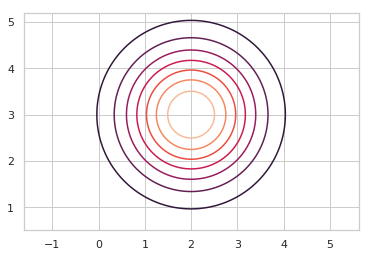

In [20]:
%matplotlib inline
mu = [2, 3]
cov = [1, 0], [0, 1]
rv = sp.stats.multivariate_normal(mu, cov)
xx = np.linspace(-1, 6, 120)
yy = np.linspace(-1, 6, 150)
XX, YY = np.meshgrid(xx, yy)
plt.contour(XX, YY, rv.pdf(np.dstack([XX, YY])))
plt.axis("equal")
plt.xlim(0, 4)
plt.ylim(0.5, 5.2)

eg. 
$\mu = \begin{bmatrix}2 \\ 3 \end{bmatrix}$,
$\Sigma = \begin{bmatrix}2 & 3 \\ 3 & 7 \end{bmatrix}$

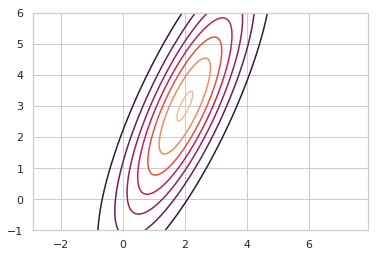

In [36]:
mu = [2, 3]
cov = [2, 3], [3, 7]
rv = sp.stats.multivariate_normal(mu, cov)
xx = np.linspace(-1, 6, 120)
yy = np.linspace(-1, 6, 150)
XX, YY = np.meshgrid(xx, yy)
plt.contour(XX, YY, rv.pdf(np.dstack([XX, YY])))
plt.axis("equal")
plt.show()

# 2. 가우시안 정규 분포와 고유값 분해
- 공분산 행렬 $\Sigma$은 대칭행렬이므로, 대각화 가능
$$ \Sigma^{-1} = V \Lambda^{-1}V^T$$
- 따라서
$$
\begin{eqnarray}
\mathcal{N}(x)
&\propto& \exp \left( -\dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x- \mu) \right) \\
&=& \exp \left( -\dfrac{1}{2}(x-\mu)^T V \Lambda^{-1} V^T (x- \mu) \right) \\
&=& \exp \left( -\dfrac{1}{2} x'^T \Lambda^{-1} x' \right) \\
\end{eqnarray}
$$
- V : $\Sigma$의 eigen vector
- 새로운 확률변수$x' = V^{-1}(x-\mu)$ 
- Cov[x']: $\Sigma$의 matrix of eigenvalues $\Lambda$
- x' 의미 
    - $\mu$만큼 평행이동 후 eigen vectors를 basis vector로 하는 변환
    - 변수간 상관관관계가 소거
    - 활용: PCA, 상관관계 높은 변수를 $x_1',x_2'$로 변환

In [39]:
mu = [2, 3]
cov = [[4, 3], [3, 5]]
w, v = np.linalg.eig(cov)

In [65]:
print('eigen value: w', w, 'eigen vector: v', v, sep = '\n')

eigen value: w
[1.45861873 7.54138127]
eigen vector: v
[[-0.76301998 -0.6463749 ]
 [ 0.6463749  -0.76301998]]


In [66]:
w_cov = [[1.45861873, 0], [0, 7.54138127]]

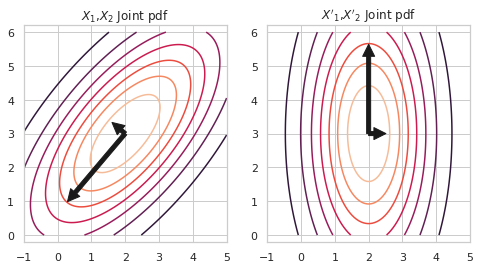

In [70]:
xx = np.linspace(-1, 5, 120)
yy = np.linspace(0, 6, 150)
XX, YY = np. meshgrid(xx, yy)

plt. figure(figsize=(8, 4))

d = dict(facecolor='k', edgecolor='k')

plt.subplot(121)
rv1 = sp.stats.multivariate_normal(mu, cov)
plt.contour(XX, YY, rv1.pdf(np.dstack([XX,YY])))
plt.annotate("", xy=(mu + 0.35 * w[0] * v[:, 0]), xytext=mu, arrowprops=d)
plt.annotate("", xy=(mu + 0.35 * w[1] * v[:, 1]), xytext=mu, arrowprops=d)
plt.title("$X_1$,$X_2$ Joint pdf")
plt.axis('equal')

#Cov(x)의 eigen vector(v)에 대한 좌표변환
#Cov(x') = Cov(x)의 matrix of eigen values(w_cov)
plt.subplot(122)
rv2 = sp.stats.multivariate_normal(mu, w_cov) #Cov(x)의 좌표변환
plt.contour(XX, YY, rv2.pdf(np.dstack([XX,YY])))
plt.annotate("", xy=(mu + 0.35 * w[0] * np.array([1, 0])), xytext=mu, arrowprops=d)
plt.annotate("", xy=(mu + 0.35 * w[1] * np.array([0, 1])), xytext=mu, arrowprops=d)
plt.title("$X'_1$,$X'_2$ Joint pdf")
plt.axis('equal')



plt.show()

# 3. 다변수 가우시안 정규분포의 조건부 확률분포
- M차원에서 N차원이 관측되더라도, 남은 M-N개 확률변수들의 조건부 분포는, 가우시안 정규분포를 띤다.

# 4. 다변수 가우시안 정규분포의 주변 확률분포
- 마찬가지로 가우시안 정규분포를 띤다.
$$\int p(x_1, x_2) dx_2 = \mathcal{N}(x_1; \mu''1, \sigma''^2_1)$$